<a href="https://colab.research.google.com/github/channingpitts/assignment4/blob/main/assignment4_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

In [4]:
# load data
cars = pd.read_csv('/content/cars_hw.csv')

In [5]:
cars.dtypes

Unnamed: 0            int64
Make                 object
Make_Year             int64
Color                object
Body_Type            object
Mileage_Run           int64
No_of_Owners         object
Seating_Capacity      int64
Fuel_Type            object
Transmission         object
Transmission_Type    object
Price                 int64
dtype: object

In [6]:
cars.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [7]:
cars.isnull().sum()

Unnamed: 0           0
Make                 0
Make_Year            0
Color                0
Body_Type            0
Mileage_Run          0
No_of_Owners         0
Seating_Capacity     0
Fuel_Type            0
Transmission         0
Transmission_Type    0
Price                0
dtype: int64

In [8]:
cars.shape

(976, 12)

In [9]:
cars['Price'].describe()

count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64

<Axes: xlabel='Age', ylabel='Price'>

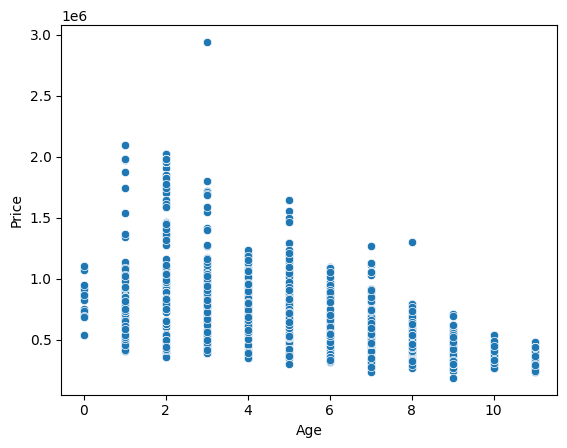

In [10]:
cars['Age'] = max(cars['Make_Year'])-cars['Make_Year'] # Convert year to age
sns.scatterplot(data=cars, y='Price', x='Age')

<Axes: xlabel='age_ihs', ylabel='price_ihs'>

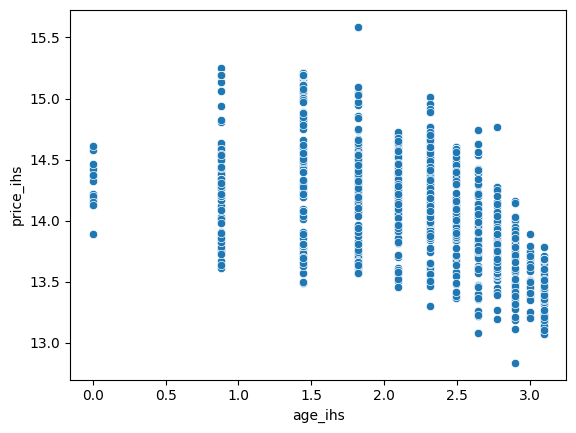

In [11]:
# Take arcsinh transformation to rescale the variables
cars['price_ihs'] = np.arcsinh(cars['Price'])
cars['age_ihs'] = np.arcsinh(cars['Age'])
sns.scatterplot(data=cars,y='price_ihs',x='age_ihs') # We've got some outliers here

<Axes: >

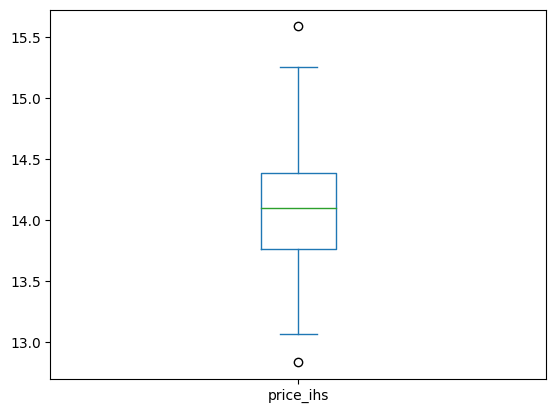

In [12]:
# look for outliers
cars['price_ihs'].plot.box()

<Axes: >

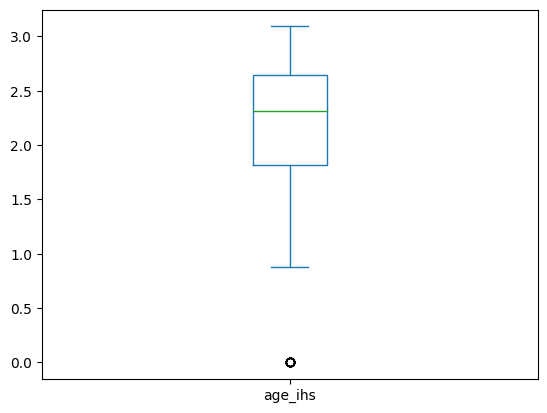

In [13]:
# look for outliers
cars['age_ihs'].plot.box()

<Axes: xlabel='age_ihs', ylabel='price_ihs'>

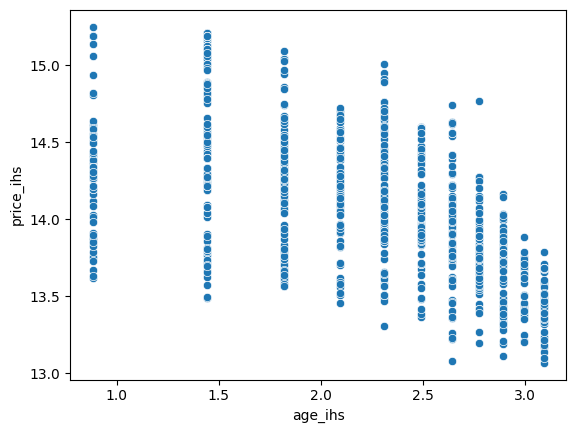

In [14]:
# Drop outliers:
cars = cars.loc[cars['price_ihs']>13,:]
cars = cars.loc[cars['price_ihs']<15.5,:]
cars = cars.loc[cars['age_ihs']>0,:]
sns.scatterplot(data=cars,y='price_ihs',x='age_ihs')

In [15]:
# 2, summarizing new variable
cars['price_ihs'].describe()

count    960.000000
mean      14.101029
std        0.448406
min       13.068963
25%       13.757351
50%       14.095412
75%       14.383378
max       15.250595
Name: price_ihs, dtype: float64

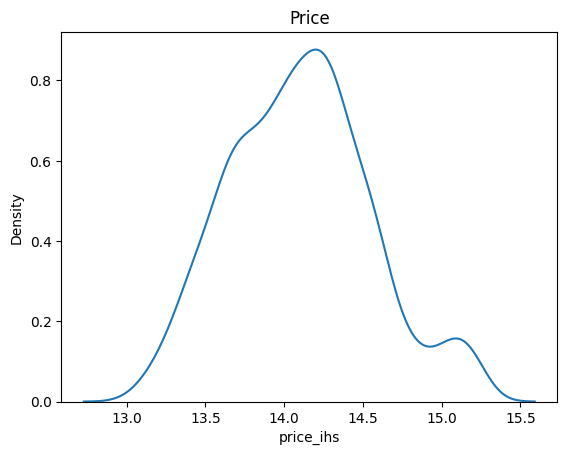

In [16]:
# 2, kernel density plot
sns.kdeplot(cars['price_ihs'])
plt.title('Price')
plt.show()

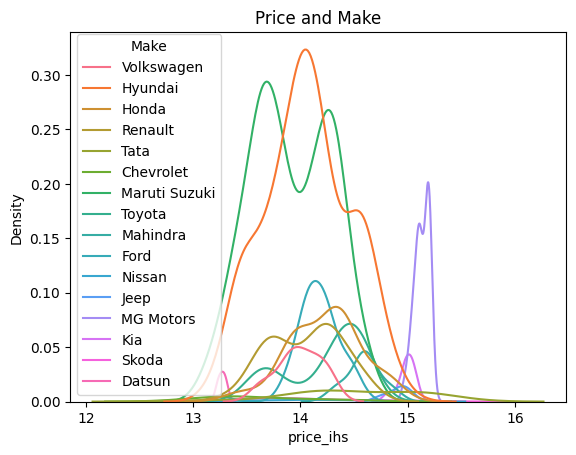

In [17]:
# 2, kernel density plot
sns.kdeplot(data=cars, x='price_ihs', hue='Make')
plt.title('Price and Make')
plt.show()

In [18]:
# 2, group by
var = 'price_ihs'
group = 'Make'
cars.loc[:,[var,group]].groupby(group).describe()

price_ihs                                                        \
                  count       mean       std        min        25%        50%   
Make                                                                            
Chevrolet           6.0  13.613042  0.480975  13.188151  13.261539  13.445433   
Datsun              3.0  13.269194  0.036311  13.232114  13.251449  13.270783   
Ford               52.0  14.161427  0.210895  13.270783  14.054527  14.162640   
Honda              73.0  14.229465  0.336972  13.356645  13.965653  14.266586   
Hyundai           303.0  14.060094  0.399580  13.114331  13.784019  14.059241   
Jeep                4.0  14.909738  0.105084  14.763300  14.876417  14.933413   
Kia                 8.0  14.985324  0.076877  14.822738  14.965389  14.996253   
MG Motors          35.0  15.132199  0.066263  14.971763  15.088892  15.122762   
Mahindra           18.0  14.592100  0.159906  14.280502  14.544955  14.598828   
Maruti Suzuki     290.0  13.908777  0.372504  13.068963  13.617669  13.862392   
Nissan              2.0  14.075354  0.440013  13.764217  13.919785  14.075354   
Renault            66.0  14.043958  0.335682  13.260385  13.759991  14.068542   
Skoda               4.0  14.020662  0.507369  13.678545  13.728452  13.816925   
Tata               17.0  14.504729  0.595957  13.077366  14.252474  14.368246   
Toyota             50.0  14.228654  0.360112  13.508985  13.864561  14.396608   
Volkswagen         29.0  13.987889  0.203839  13.597355  13.896168  14.009431   

                                     
                     75%        max  
Make                                 
Chevrolet      13.864828  14.394369  
Datsun         13.287734  13.304685  
Ford           14.269131  14.572571  
Honda          14.419827  14.938490  
Hyundai        14.330129  15.063692  
Jeep           14.966733  15.008827  
Kia            15.042662  15.063117  
MG Motors      15.190744  15.211260  
Mahindra       14.654396  14.890513  
Maruti Suzuki  14.239470  14.659661  
Nissan         14.230922  14.386490  
Renault        14.291735  14.660520  
Skoda          14.109134  14.770252  
Tata           15.038698  15.250595  
Toyota         14.531374  14.596669  
Volkswagen     14.150553  14.272935

The most expensive car brands are MG Motors, Kia, and Jeep. Most of the car brands have similar mean prices once outliers were dropped.

In [19]:
# 3, splitting the data

from sklearn.model_selection import train_test_split

X = cars.drop('price_ihs', axis=1)  # Features (all columns except the target)
y = cars['price_ihs']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [21]:
# rescaling mileage
cars['mileage_ihs'] = np.arcsinh(cars['Mileage_Run'])

In [22]:
# 4, making a model for only numeric variables
y = cars['price_ihs'] # Create target variable vector
X = cars.loc[:,['age_ihs', 'Seating_Capacity', 'mileage_ihs']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

In [23]:
# R squared
reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X_test, y_test)) # R squared measure

12.698016807932134
[-0.55369073  0.08912432  0.19333662]
0.3599501825434104


In [24]:
# Root Mean Square Error
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

0.349764389147041


In [25]:
# 4, model for categorical variables
from sklearn.preprocessing import LabelBinarizer
one_hot_encoder = LabelBinarizer()

In [26]:
oh = one_hot_encoder.fit_transform(cars['Make']) # One-hot encode the 'Make' variable
names = one_hot_encoder.classes_ # Get names of the classes
Make_DF = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables
Make_DF.head()

,Chevrolet,Datsun,Ford,Honda,Hyundai,Jeep,Kia,MG Motors,Mahindra,Maruti Suzuki,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [27]:
oh = one_hot_encoder.fit_transform(cars['Color']) # One-hot encode the 'Color' variable
names = one_hot_encoder.classes_ # Get names of the classes
Color_DF = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables
Color_DF.head()

,beige,black,blue,bronze,brown,golden,green,grey,maroon,orange,purple,red,silver,white,yellow
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [28]:
oh = one_hot_encoder.fit_transform(cars['Body_Type']) # One-hot encode the 'Body Type' variable
names = one_hot_encoder.classes_ # Get names of the classes
Body_DF = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables
Body_DF.head()

,crossover,hatchback,muv,sedan,suv
0,0,0,0,1,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,1,0,0,0


In [29]:
oh = one_hot_encoder.fit_transform(cars['No_of_Owners']) # One-hot encode the 'Owners' variable
names = one_hot_encoder.classes_ # Get names of the classes
Owners_DF = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables
Owners_DF.head()

,1st,2nd,3rd
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [30]:
oh = one_hot_encoder.fit_transform(cars['Fuel_Type']) # One-hot encode the 'Fuel Type' variable
names = one_hot_encoder.classes_ # Get names of the classes
Fuel_DF = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables
Fuel_DF.head()

,diesel,petrol,petrol+cng
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [31]:
oh = one_hot_encoder.fit_transform(cars['Transmission']) # One-hot encode the 'Transmission' variable
names = one_hot_encoder.classes_ # Get names of the classes
Transmission_DF = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables
Transmission_DF.head()

,4-Speed,5-Speed,6-Speed,7-Speed,CVT
0,0,0,0,1,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [32]:
## Concatenate:
X_variables = pd.concat([Make_DF, Color_DF, Body_DF, Owners_DF, Fuel_DF, Transmission_DF],axis=1) # Concatenate engineered features
X_variables.head()

,Chevrolet,Datsun,Ford,Honda,Hyundai,Jeep,Kia,MG Motors,Mahindra,Maruti Suzuki,...,2nd,3rd,diesel,petrol,petrol+cng,4-Speed,5-Speed,6-Speed,7-Speed,CVT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [33]:
y = cars['price_ihs']
X_train, X_test, y_train, y_test = train_test_split(X_variables,y,test_size=.2,random_state=100)

In [34]:
# model for categorical variables
reg = LinearRegression().fit(X_train,y_train) # Fit the linear model
print(reg.score(X_test, y_test)) # R squared measure

y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

0.6179006323806928
0.27024449792385935


The categorical model performs better than the numerical model.

In [40]:
X.head()

,age_ihs,Seating_Capacity,mileage_ihs
0,2.312438,5,11.398883
1,2.491780,5,10.611770
2,1.818446,5,10.986648
3,2.312438,5,11.175493
4,2.312438,5,10.824806


In [46]:
cars.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price,Age,price_ihs,age_ihs,mileage_ihs
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000,5,14.088586,2.312438,11.398883
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000,6,14.125932,2.491780,10.611770
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000,3,14.276726,1.818446,10.986648
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000,5,13.626768,2.312438,11.175493
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000,5,13.845069,2.312438,10.824806


In [49]:
# create model for numerical and categorical variables
X2 = pd.get_dummies(cars['Body_Type', 'Color', 'Fuel_Type', 'Transmission', 'Transmission_Type']) # Create dummies

combined = pd.concat([X, X2], axis=1)  # Concatenate engineered features
combined.head()


KeyError: ignored

In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# 5, PolynomialFeatures
expander = PolynomialFeatures(degree=1,include_bias=False) # Create the expander
Z = expander.fit_transform(combined) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

X_train, X_test, y_train, y_test = train_test_split(zdf,y,test_size=.2,random_state=100)
reg = LinearRegression().fit(X_train,y_train) # Fit the linear model
print("R squared:", reg.score(X_test, y_test)) # R squared measure

y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse)

In [ ]:
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(combined) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

X_train, X_test, y_train, y_test = train_test_split(zdf,y,test_size=.2,random_state=100)
reg = LinearRegression().fit(X_train,y_train) # Fit the linear model
print("R squared:", reg.score(X_test, y_test)) # R squared measure

y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse)

In [ ]:
expander = PolynomialFeatures(degree=3,include_bias=False) # Create the expander
Z = expander.fit_transform(combined) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

X_train, X_test, y_train, y_test = train_test_split(zdf,y,test_size=.2,random_state=100)
reg = LinearRegression().fit(X_train,y_train) # Fit the linear model
print("R squared:", reg.score(X_test, y_test)) # R squared measure

y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse)

In [51]:
# 6, predicted values
#Best model: categorical
X_train, X_test, y_train, y_test = train_test_split(X_variables,y,test_size=.2,random_state=100)

reg = LinearRegression().fit(X_train,y_train) # Fit the linear model
print("R squared:", reg.score(X_test, y_test)) # R squared measure

y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse)

R squared: 0.6179006323806928
Root Mean Square Error (RMSE): 0.27024449792385935


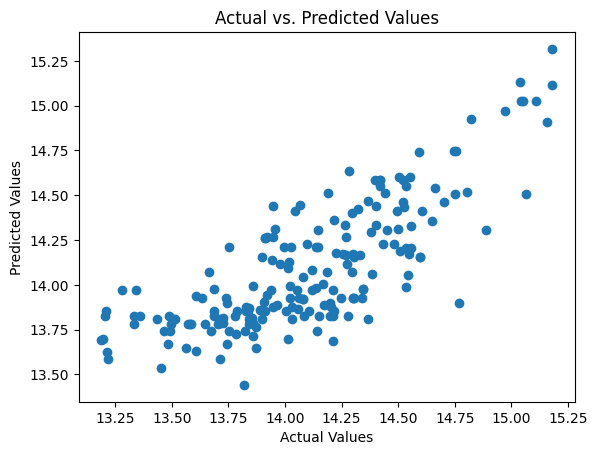

In [52]:
# 6, plot against predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

The predicted and true values roughly line up along the diagonal

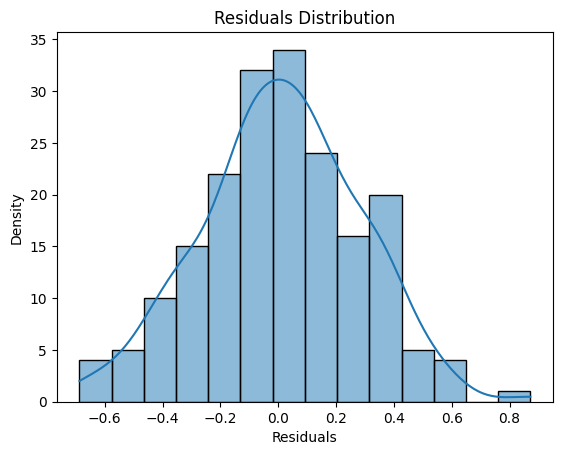

In [53]:
# Compute residuals
residuals = y_test - y_pred

sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

The residuals look roughly bell-shaped around 0 so it is evenly distributed. A lower RMSE suggest that the predictions are similar to the actual values. This model is also able to show the variability of the data we have.

In [54]:
# 7, Regression Tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [60]:
# Selecting relevant features
X = cars[['age_ihs', 'mileage_ihs', 'Seating_Capacity']]
y = cars['price_ihs'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X_variables, y, test_size=.2, random_state=100)

reg = DecisionTreeRegressor(max_depth=2, random_state=100)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("R squared:", reg.score(X_test, y_test)) # R squared measure
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse)

R squared: 0.550628241421912
Root Mean Square Error (RMSE): 0.293070151425525


In [61]:
reg = DecisionTreeRegressor(max_depth=5, random_state=100)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("R squared:", reg.score(X_test, y_test)) # R squared measure
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse)

R squared: 0.7036453008133605
Root Mean Square Error (RMSE): 0.23799871390085314


In [62]:
reg = DecisionTreeRegressor(max_depth=10, random_state=100)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("R squared:", reg.score(X_test, y_test)) # R squared measure
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse)

R squared: 0.7645481928406415
Root Mean Square Error (RMSE): 0.21213860821944264


In [63]:
reg = DecisionTreeRegressor(max_depth=15, random_state=100)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("R squared:", reg.score(X_test, y_test)) # R squared measure
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse)

R squared: 0.7601743205887062
Root Mean Square Error (RMSE): 0.21409993868430813


The tree with depth 10 gives the best results because it has the highest R squared and lowest RMSE

R squared: 0.7645481928406415
Root Mean Square Error (RMSE): 0.21213860821944264


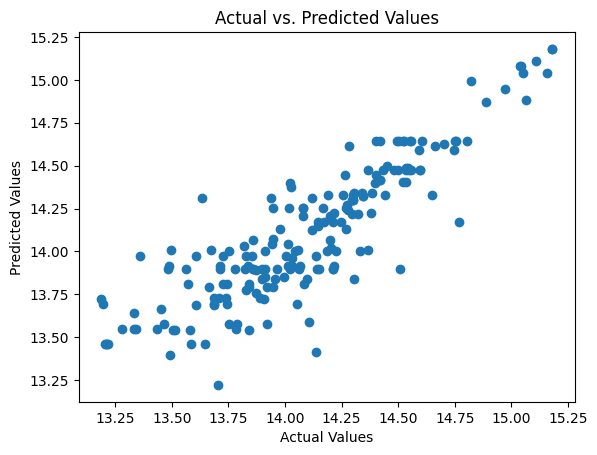

In [64]:
# 8, model evaluation
reg = DecisionTreeRegressor(max_depth=10, random_state=100)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("R squared:", reg.score(X_test, y_test)) # R squared measure
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", rmse)

#Plot test against predicted values for best model
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

The predicted values and true values line up along the diagonal fairly well.

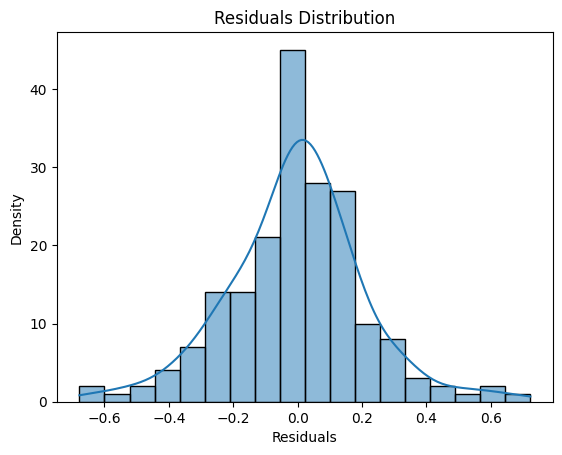

In [65]:
# Compute residuals
residuals = y_test - y_pred

sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

The residuals look roughly like a bell-shaped around 0.

9, The classification and regression tree performed better on the test set. It has a lower RMSE and a higher R squared.

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

In [66]:
df = pd.read_csv('/content/contraception_hw.csv')

In [67]:
df.head()

,Unnamed: 0,age,edu,edu_spouse,numberChildren,religion,working,spouse_occupation,standardOfLivingIndex,mediaExposure,method
0,1,24,2,3,3,1,1,2,3,0,1
1,2,45,1,3,10,1,1,3,4,0,1
2,3,43,2,3,7,1,1,3,4,0,1
3,4,42,3,2,9,1,1,3,3,0,1
4,5,36,3,3,8,1,1,3,2,0,1


In [68]:
# 1, tabulation
df['method'].value_counts()

1    629
3    511
2    333
Name: method, dtype: int64

In [69]:
# cross tab with number of Children
pd.crosstab(df['method'], df['numberChildren'])

numberChildren,0,1,2,3,4,5,6,7,8,9,10,11,12,13,16
method,,,,,,,,,,,,,,,
1,95,143,114,70,57,44,35,18,29,5,9,6,4,0,0
2,0,46,56,70,62,36,27,19,9,3,2,2,0,1,0
3,2,87,106,119,78,55,30,12,9,8,0,3,0,1,1


Couples that do not use contraception more frequently have 0 children than couples using short or long term contraception. No contraception and long term contraception have more children than short term contraception.

In [71]:
# 2, splititng sample
y = df['method'] # Create target variable vector
X = df.drop(['method'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

[Text(0.4230769230769231, 0.875, 'x[3] <= 0.5\nsquared_error = 0.765\nsamples = 1178\nvalue = 1.919'),
 Text(0.15384615384615385, 0.625, 'x[0] <= 17.5\nsquared_error = 0.104\nsamples = 75\nvalue = 1.053'),
 Text(0.07692307692307693, 0.375, 'squared_error = 0.0\nsamples = 1\nvalue = 3.0'),
 Text(0.23076923076923078, 0.375, 'x[6] <= 3.5\nsquared_error = 0.053\nsamples = 74\nvalue = 1.027'),
 Text(0.15384615384615385, 0.125, 'squared_error = 0.0\nsamples = 70\nvalue = 1.0'),
 Text(0.3076923076923077, 0.125, 'squared_error = 0.75\nsamples = 4\nvalue = 1.5'),
 Text(0.6923076923076923, 0.625, 'x[0] <= 37.5\nsquared_error = 0.756\nsamples = 1103\nvalue = 1.978'),
 Text(0.5384615384615384, 0.375, 'x[3] <= 2.5\nsquared_error = 0.758\nsamples = 783\nvalue = 2.115'),
 Text(0.46153846153846156, 0.125, 'squared_error = 0.786\nsamples = 382\nvalue = 1.955'),
 Text(0.6153846153846154, 0.125, 'squared_error = 0.684\nsamples = 401\nvalue = 2.267'),
 Text(0.8461538461538461, 0.375, 'x[1] <= 2.5\nsquared

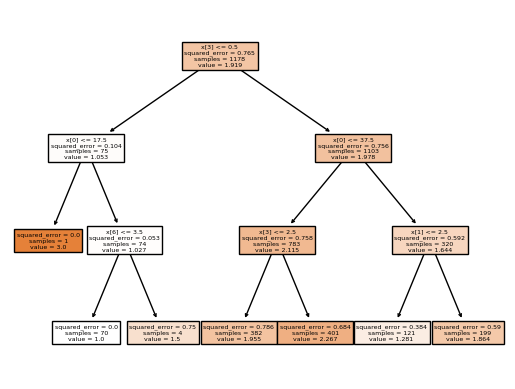

In [72]:
# 3, regression tree
y = df['method'] # Create target variable vector
X = df.drop(['method', 'Unnamed: 0'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

reg = DecisionTreeRegressor(max_depth=3, random_state=100)
reg.fit(X_train, y_train)

# Visualize results:
tree.plot_tree(reg,filled=True)

The terminal nodes do not match what we expect to be the predicted values for methods of 1, 2, and 3 that represent categorical choices, rather they are decimals. Options other than the three  contraception answers are not possible outcomes in our data.

[Text(0.4230769230769231, 0.875, 'x[3] <= 0.5\ngini = 0.647\nsamples = 1178\nvalue = [502, 269, 407]'),
 Text(0.15384615384615385, 0.625, 'x[0] <= 17.5\ngini = 0.052\nsamples = 75\nvalue = [73, 0, 2]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.23076923076923078, 0.375, 'x[6] <= 3.5\ngini = 0.027\nsamples = 74\nvalue = [73, 0, 1]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.0\nsamples = 70\nvalue = [70, 0, 0]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 0, 1]'),
 Text(0.6923076923076923, 0.625, 'x[1] <= 2.5\ngini = 0.654\nsamples = 1103\nvalue = [429, 269, 405]'),
 Text(0.5384615384615384, 0.375, 'x[0] <= 37.5\ngini = 0.562\nsamples = 367\nvalue = [207, 39, 121]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.592\nsamples = 246\nvalue = [109, 27, 110]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.326\nsamples = 121\nvalue = [98, 12, 11]'),
 Text(0.8461538461538461, 0.375, 'x[0] <= 32.5\ngini = 0.662\nsamples

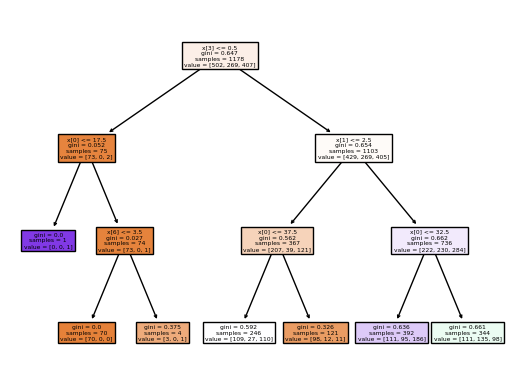

In [73]:
# 4, classification tree
y = df['method'] # Create target variable vector
X = df.drop(['method', 'Unnamed: 0'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

# Fit decision tree:
cart = tree.DecisionTreeClassifier(max_depth = 3) # Create a classifier object
cart = cart.fit(X_train, y_train) # Fit the classifier

# Visualize results:
tree.plot_tree(cart,filled=True)

This uses discrete splits in the data but also gives us outcomes we can understand with our categorical variables. Individuals with more children and less education are more likely to use long term contraception while having a higher education leads to short-term options.

In [ ]:
accuracy = (tab.iloc[0, 0] + tab.iloc[1, 1] + tab.iloc[2, 2]) / (np.sum(tab.iloc[0, :]) + np.sum(tab.iloc[1, :]) + np.sum(tab.iloc[2, :]))
print("Accuracy for overall model:", accuracy)

In [79]:
# 5, computing a confusion matrix

# Make Predictions on the Test Set
y_hat = cart.predict(X_test)

tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0] + tab.iloc[1,1] + tab.iloc[2,2]) / (np.sum(tab.iloc[0, :]) + np.sum(tab.iloc[1, :]) + np.sum(tab.iloc[2, :])) # Compute Accuracy
print('Overall Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

Overall Accuracy:  0.5016949152542373 



col_0,1,2,3
method,,,
1,40,37,50
2,3,38,23
3,4,30,70


In [78]:
# accuracy for each method
no_contraception = tab.iloc[0, 0] / np.sum(tab.iloc[0, :])
long_term = tab.iloc[1, 1] / np.sum(tab.iloc[1, :])
short_term = tab.iloc[2, 2] / np.sum(tab.iloc[2, :])

print("Accuracy for no contraception:", no_contraception)
print("Accuracy for long-term:", long_term)
print("Accuracy for short-term:", short_term)

Accuracy for no contraception: 0.31496062992125984
Accuracy for long-term: 0.59375
Accuracy for short-term: 0.6730769230769231


6. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

You cannot use a linear probability model for this problem because of its non-linear nature of using integers to represent categories/meaning. When I tried to run the regression tree, the predicted variables did not make sense because they did not align with our previously decided categories.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

In [ ]:
# load data
pre_trial = pd.read_csv('/content/pretrial_data.csv')

In [ ]:
pre_trial.describe()